In [24]:
import pandas as pd
df = pd.read_csv("uber-raw-data-jun14.csv")
#df.style.set_properties(**{'background-color':'lightblue','color':'blue'})
df.style.background_gradient(cmap="cyan")
df.head()


,Date/Time,Lat,Lon,Base
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512
2,6/1/2014 0:04:00,40.3461,-74.6610,B02512
3,6/1/2014 0:04:00,40.7555,-73.9833,B02512
4,6/1/2014 0:07:00,40.6880,-74.1831,B02512


In [2]:
df.info()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663844 entries, 0 to 663843
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  663844 non-null  object 
 1   Lat        663844 non-null  float64
 2   Lon        663844 non-null  float64
 3   Base       663844 non-null  object 
dtypes: float64(2), object(2)
memory usage: 20.3+ MB


10686

In [3]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Day'] = df['Date/Time'].dt.day
df['hours'] = df['Date/Time'].dt.hour
df['Weekday'] = df['Date/Time'].dt.day_name()


trips per days(30days)

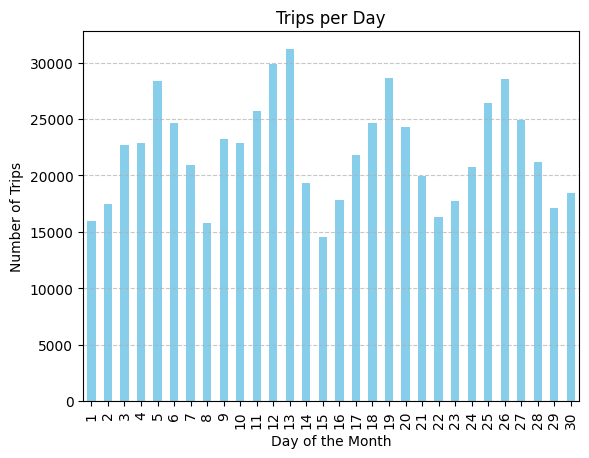

In [4]:
import matplotlib.pyplot as plt
df = df['Day'].value_counts().sort_index()

# Plot

df.plot(kind='bar', color='skyblue')

# Customize
plt.title("Trips per Day")
plt.xlabel("Day of the Month")
plt.ylabel("Number of Trips")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

trips per hours(24/7)

In [5]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Create a new column 'hour'
df['hour'] = df['Date/Time'].dt.hour
df = df['hours'].value_counts().sort_index()

# Plot

df.plot(kind='bar', color='skyblue')

# Customize
plt.title("Trips per Day")
plt.xlabel("Day of the Month")
plt.ylabel("Number of Trips")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

KeyError: 'Date/Time'

<Axes: title={'center': 'Trips by Weekday'}, ylabel='Weekday'>

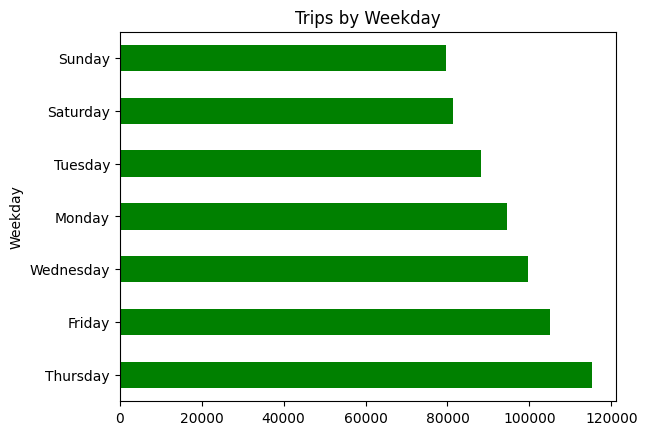

In [ ]:
df['Weekday'].value_counts().plot(kind='barh', color='green', title="Trips by Weekday")


<Axes: xlabel='Hour', ylabel='Weekday'>

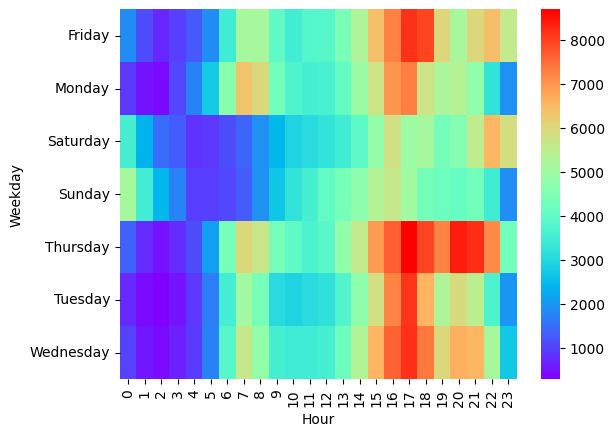

In [ ]:
import seaborn as sns
heatmap_data = df.groupby(['Weekday', 'Hour']).size().unstack()
sns.heatmap(heatmap_data, cmap="rainbow")


<Axes: xlabel='Lon', ylabel='Lat'>

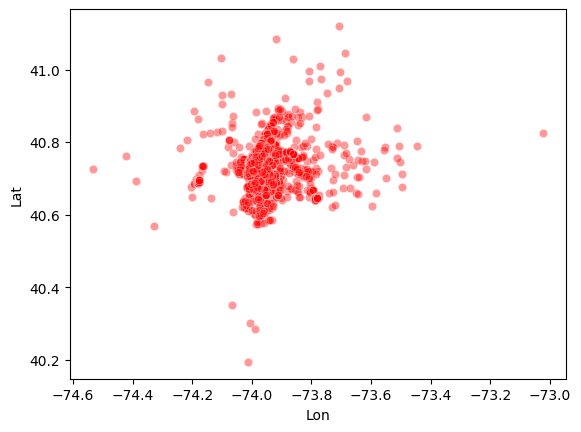

In [ ]:
sns.scatterplot(data=df.sample(10000), x='Lon', y='Lat', alpha=0.4,color='red')